# IMPORTING NECESSARY LIBRARIES

In [24]:
import pandas as pd
import re
import numpy as np
from text_unidecode import unidecode


import matplotlib.pyplot as plt
import seaborn as sns
import collections
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix





# DATA

In [2]:
df_1 = pd.read_json('Sarcasm_Headlines_Dataset.json',lines = True)
df_2 = pd.read_json('Sarcasm_Headlines_Dataset_v2.json',lines = True)

In [3]:
df_1.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
df_2.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## Since both the data sets look alike, we join them

In [5]:
df = pd.concat([df_1,df_2],axis = 0)

In [6]:
df.shape

(55328, 3)

In [7]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55328 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  55328 non-null  object
 1   headline      55328 non-null  object
 2   is_sarcastic  55328 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
df.isna().sum()


article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [10]:
df.drop('article_link',axis = 1,inplace = True)

In [11]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


# Preprocessing

## Data Cleaning

In [12]:
# Defining a regular expression pattern to match any character that is not a lowercase letter or white space 
regex = re.compile('[^a-z\s]')
# Converting the 'headline' column to lower case to ensure the uniformity
df['text'] = df['headline'].str.lower()
# Applying the regex substitution to remove all the charactors that are not lower cases and white spaces
df['text'] = df['text'].apply(lambda x: regex.sub('', x))
# Applying the unidecode function to remove accents from the text
df['text'] = df['text'].apply(lambda x: regex.sub('', unidecode(x)))
# Removing the substrings 'rt' and 'http' from the text using regular expression
df['text'] = df['text'].str.replace('rt|http', '', regex = True)
# Applying the lambda function to remove stop words with fewer than 3 
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

## Removing Stopwords

In [13]:
df['text'] = df['text'].apply(word_tokenize)

# Removing stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])
#Removing stop words
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])



## Word Normalization

In [14]:
# word normalization
stemmer  = SnowballStemmer('english')
df['text'] = df['text'].apply(lambda x:[stemmer.stem(word) for word in x])

#Joining the words back into a single text
df['final_text'] = df['text'].apply(lambda x: ' '.join(x))


# VISUALIZATION

## Top 10 most used words

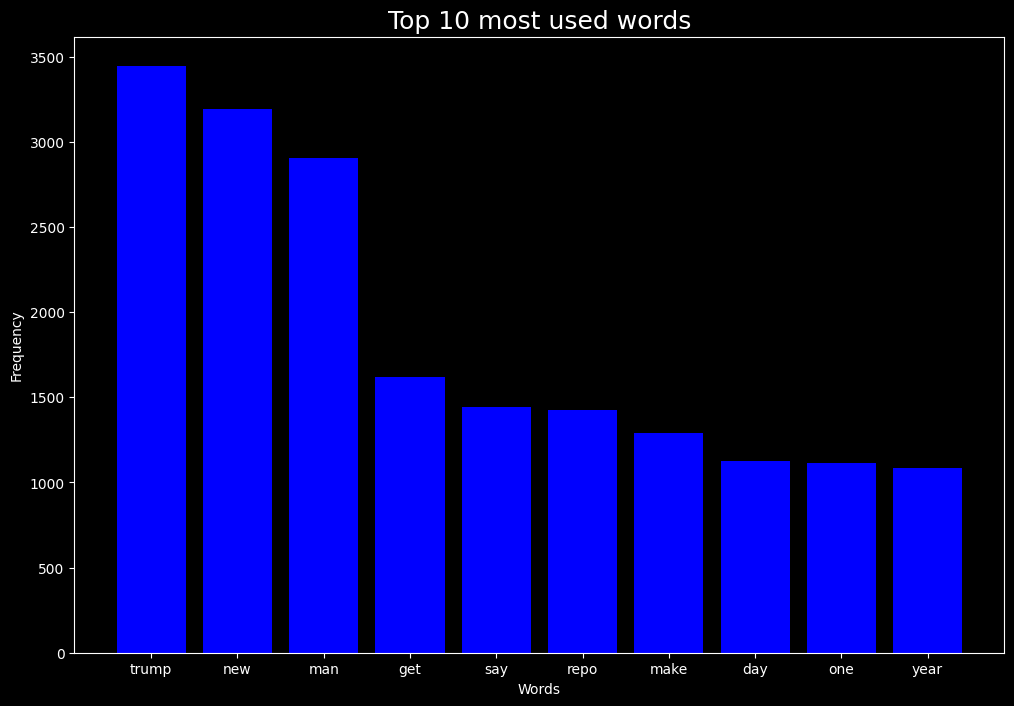

In [15]:
words = []
for text in df['final_text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

#Dark Background

plt.style.use('dark_background')
plt.figure(figsize = (12,8))

# Create the Barplot
plt.bar(range(len(top_words)),list(top_words.values()),align='center',color= 'blue')

plt.xticks(range(len(top_words)),list(top_words.keys()))
# Grid opacity
plt.grid(alpha=0)
#Title
plt.title('Top 10 most used words',fontsize=18)
#Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

In [16]:
len(word_count)

19433

## Word Graph

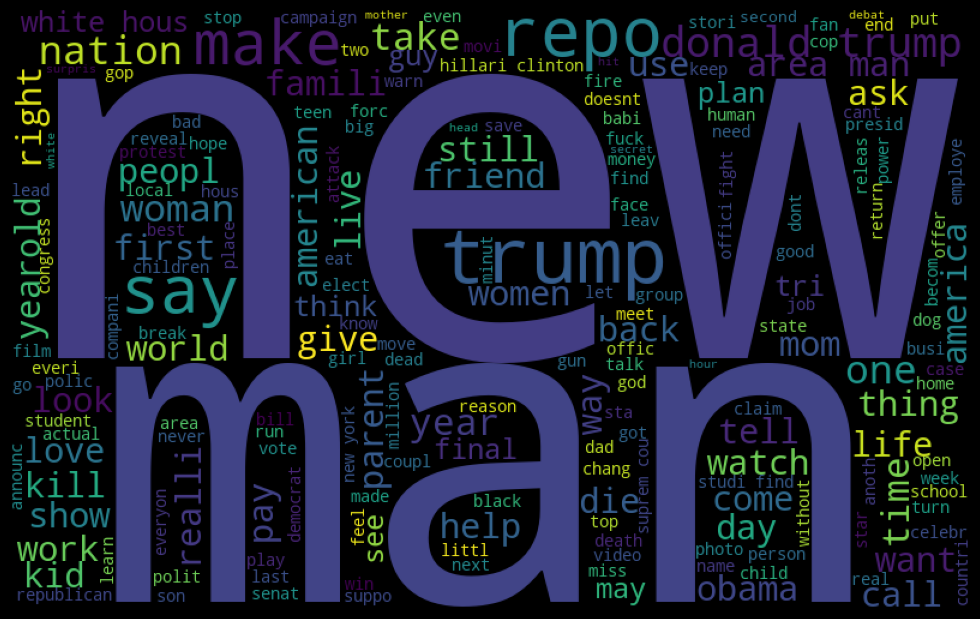

In [17]:
text = ' '.join(caption for caption in df['final_text'])

wordcloud = WordCloud(width = 800 , height =500, background_color='black',min_font_size=10).generate(text)

plt.figure(figsize =(10,6),facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# TRAINING

## Split Train/Test and Convert text to numericals

In [18]:
X = np.array(df['final_text'])
y = np.array(df['is_sarcastic'])

#Convert text to numerical
cv = CountVectorizer()
X  = cv.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

# Machine Learning Models

### Passive Aggressive classifier

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
model1 = PassiveAggressiveClassifier(C = 0.5, random_state = 5)
 
# Fitting model
model1.fit(X_train, y_train)
 
# Making prediction on test set
test_pred = model1.predict(X_test)
 
# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test, test_pred) * 100} %\n\n") 
print(classification_report(y_test,test_pred))

Test Set Accuracy : 91.6591360925357 %


              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6032
           1       0.91      0.90      0.91      5034

    accuracy                           0.92     11066
   macro avg       0.92      0.92      0.92     11066
weighted avg       0.92      0.92      0.92     11066



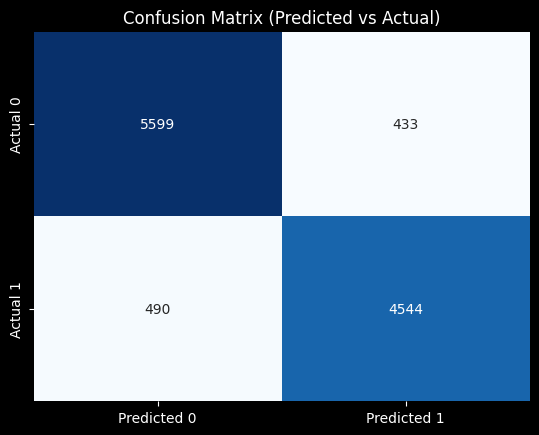

In [22]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)

# Plot the heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Predicted vs Actual)')
plt.show()

### Logistic Regression

In [26]:
logistic  = LogisticRegression(max_iter=1000)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
logistic.score(X_test,y_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6032
           1       0.87      0.84      0.85      5034

    accuracy                           0.87     11066
   macro avg       0.87      0.86      0.87     11066
weighted avg       0.87      0.87      0.87     11066



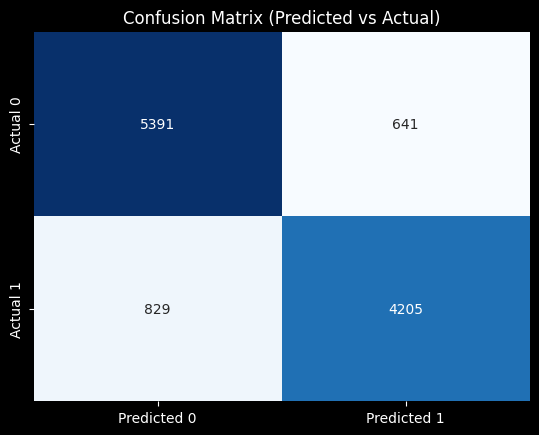

In [27]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Predicted vs Actual)')
plt.show()

### Bernoulli Naive Bayes

In [28]:
BNB= BernoulliNB()
BNB.fit(X_train,y_train)
y_pred= BNB.predict(X_test)
BNB.score(X_test,y_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.88      0.86      6032
           1       0.85      0.81      0.83      5034

    accuracy                           0.85     11066
   macro avg       0.85      0.85      0.85     11066
weighted avg       0.85      0.85      0.85     11066



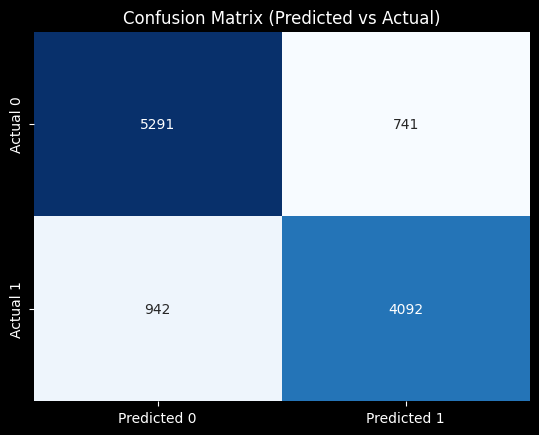

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Predicted vs Actual)')
plt.show()